In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
HD=pd.read_csv('/content/HeartDisease.csv')
HD

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


EDA

In [3]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
HD.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [5]:
HD.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Correlation
mycorr=HD.corr()
mycorr

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


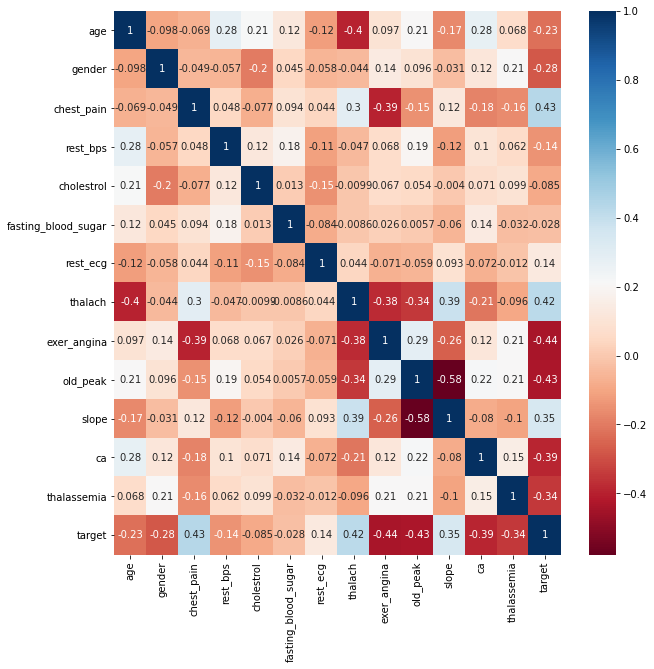

In [7]:
plt.figure(figsize=(10,10))
sb.heatmap(mycorr,annot=True,cmap='RdBu')

Decision Tree

In [8]:
from sklearn import tree

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y_dep=HD.target

In [11]:
x_ind=HD.drop('target',axis=1)
x_ind

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

In [13]:
model=tree.DecisionTreeClassifier()
model_fit=model.fit(x_train,y_train)

In [14]:
y_pred_dt=model_fit.predict(x_test)

In [15]:
y_pred_dt

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [17]:
confusion_matrix(y_test,y_pred_dt)

array([[25,  7],
       [ 2, 27]])

In [18]:
acc_dt=accuracy_score(y_test,y_pred_dt)
acc_dt

0.8524590163934426

In [19]:
import graphviz
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [20]:
x_train.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
      dtype='object')

In [21]:
data=StringIO()
export_graphviz(model_fit,out_file=data,filled=True,rounded=True,special_characters=True,
                feature_names=['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
       class_names = np.array(['No ','Yes']))

In [22]:
graph=pydotplus.graph_from_dot_data(data.getvalue())

In [23]:
graph.write_jpeg('Decision.jpeg')

True

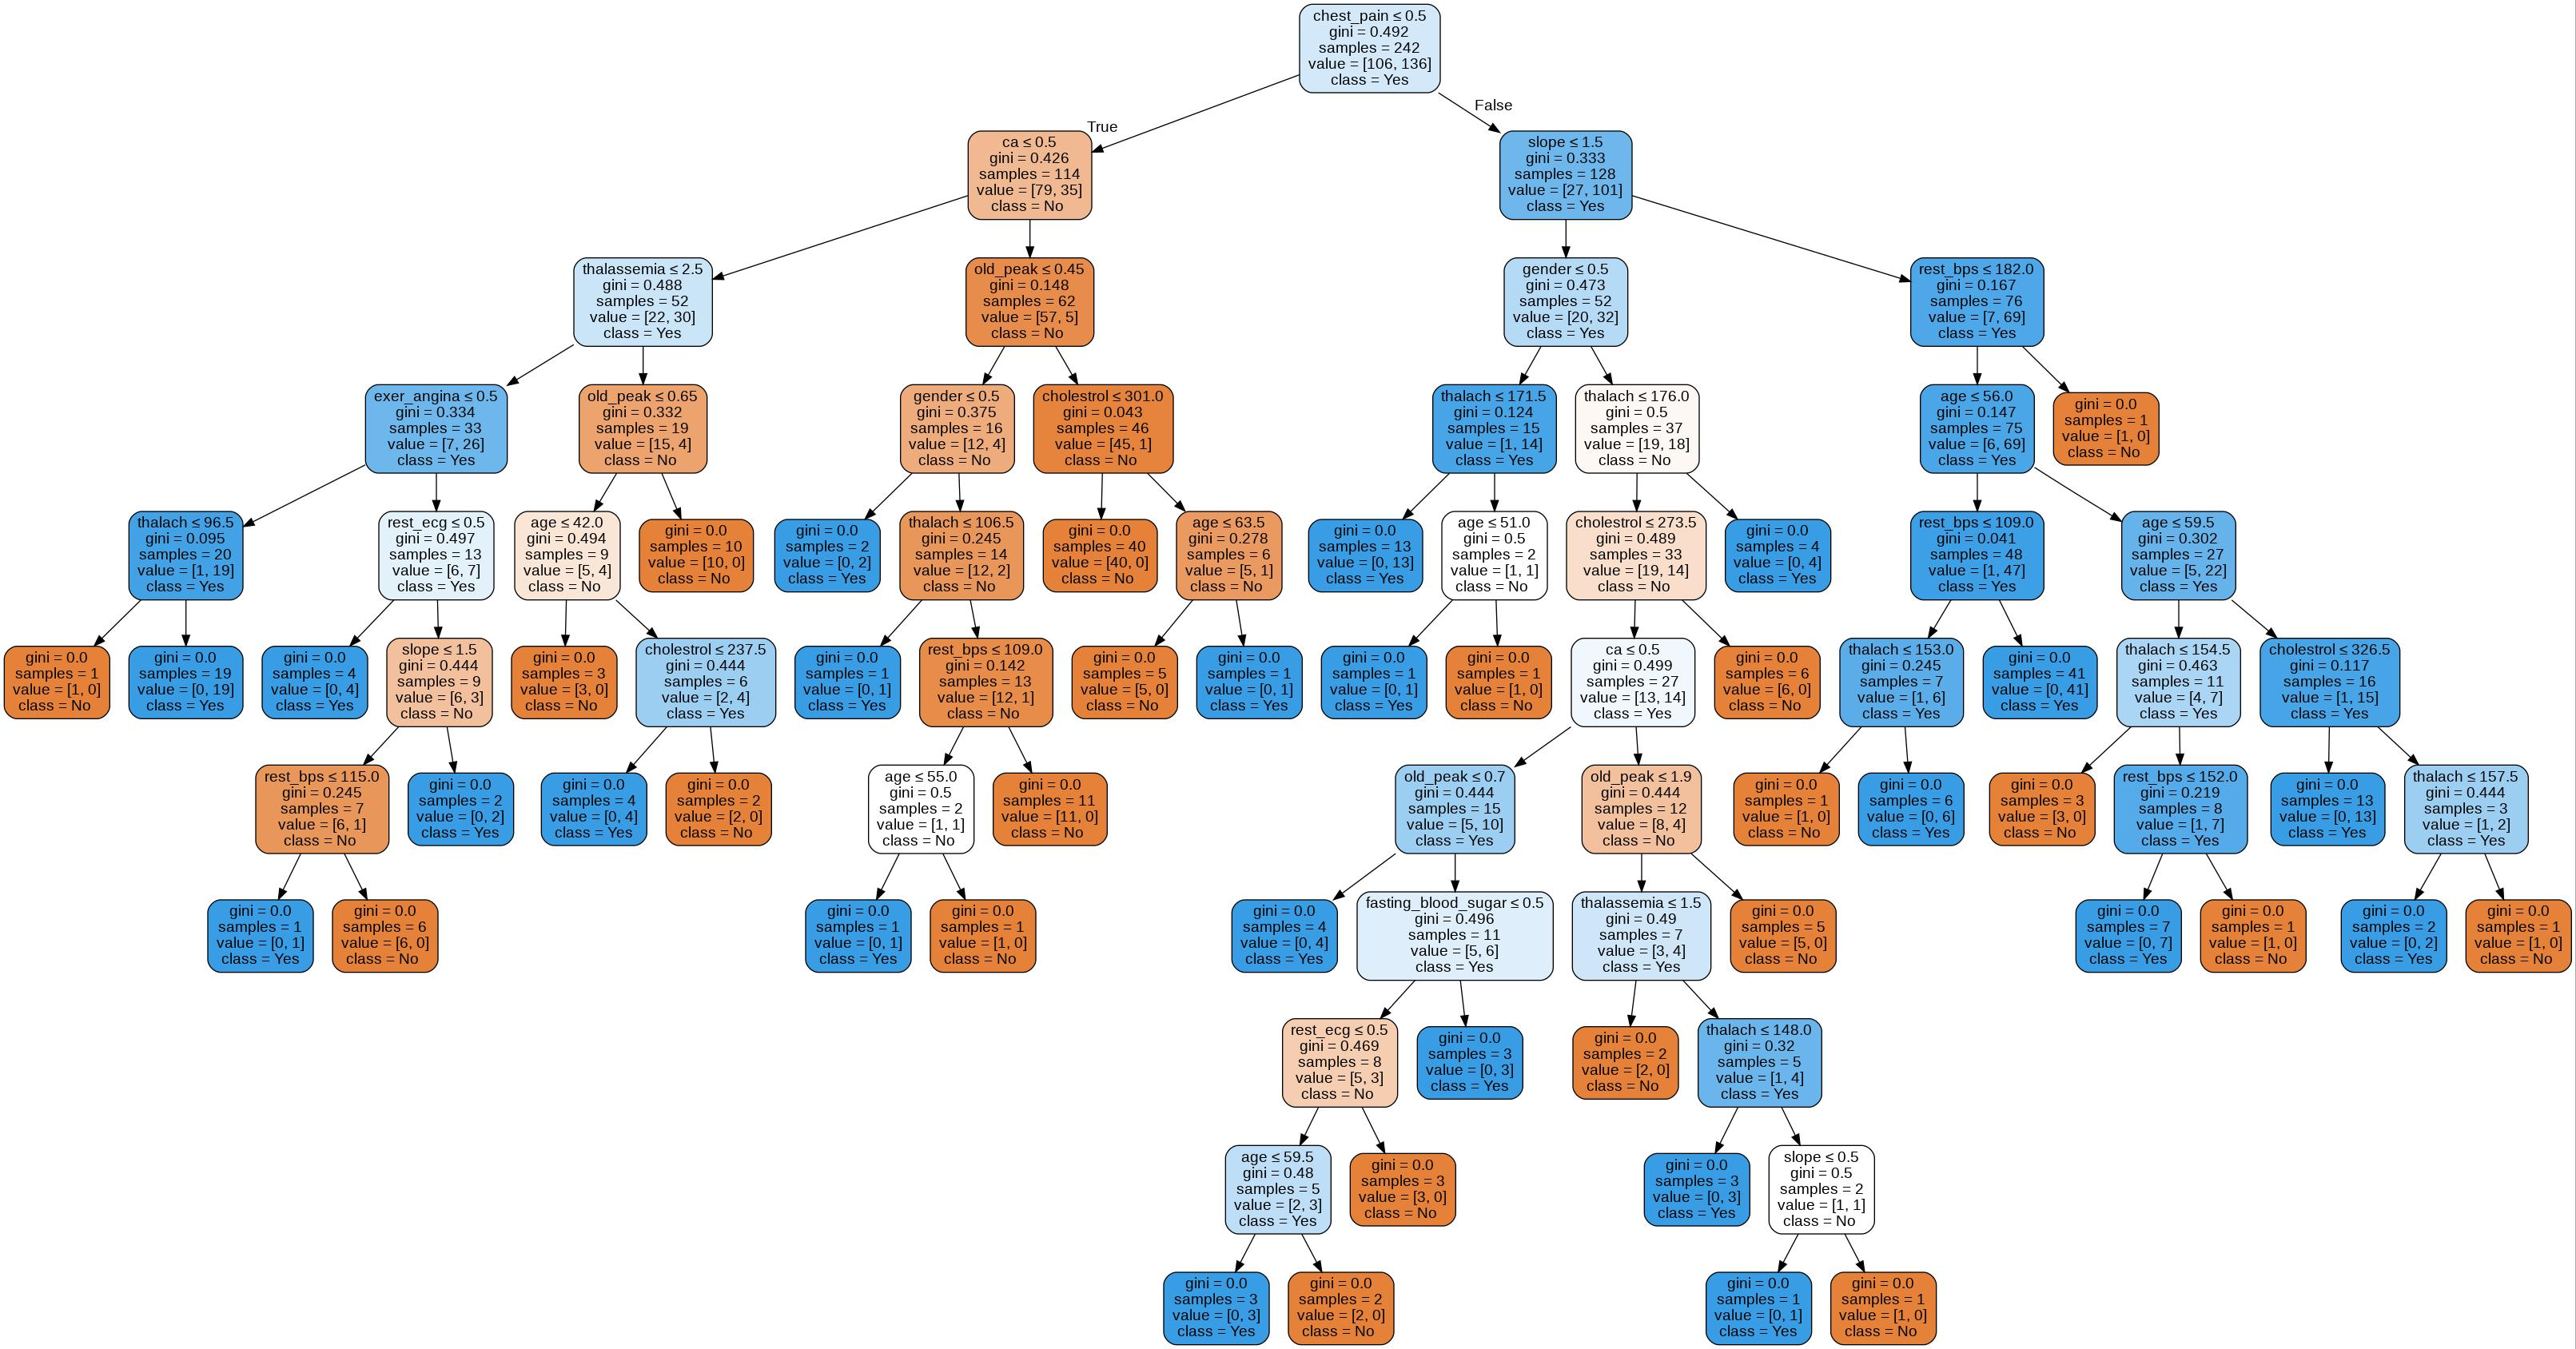

In [24]:
Image(graph.create_jpeg())

Hyperparameter Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),"criterion":("gini","entropy")
            ,"max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6)
           }

In [27]:
DT_grid=RandomizedSearchCV(tree.DecisionTreeClassifier(),
                           param_distributions=parameters,cv=5)

In [28]:
DT_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [29]:
DT_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
model1=tree.DecisionTreeClassifier( class_weight=None, criterion='entropy',
                       max_depth=70, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
model_fit1=model1.fit(x_train,y_train)

In [32]:
y_pred_dt1=model_fit1.predict(x_test)

In [33]:
confusion_matrix(y_test,y_pred_dt1)

array([[29,  3],
       [ 3, 26]])

In [34]:
acc_DT=accuracy_score(y_test,y_pred_dt1)
print("The best estimation accuracy value for Decision Tree is:",acc_DT)

The best estimation accuracy value for Decision Tree is: 0.9016393442622951


In [45]:
data=StringIO()
export_graphviz(model_fit1,out_file=data,filled=True,rounded=True,special_characters=True,
                feature_names=['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
       class_names = np.array(['No ','Yes']))

In [46]:
graph1=pydotplus.graph_from_dot_data(data.getvalue())

In [47]:
graph1.write_jpeg('Decision.jpeg')

True

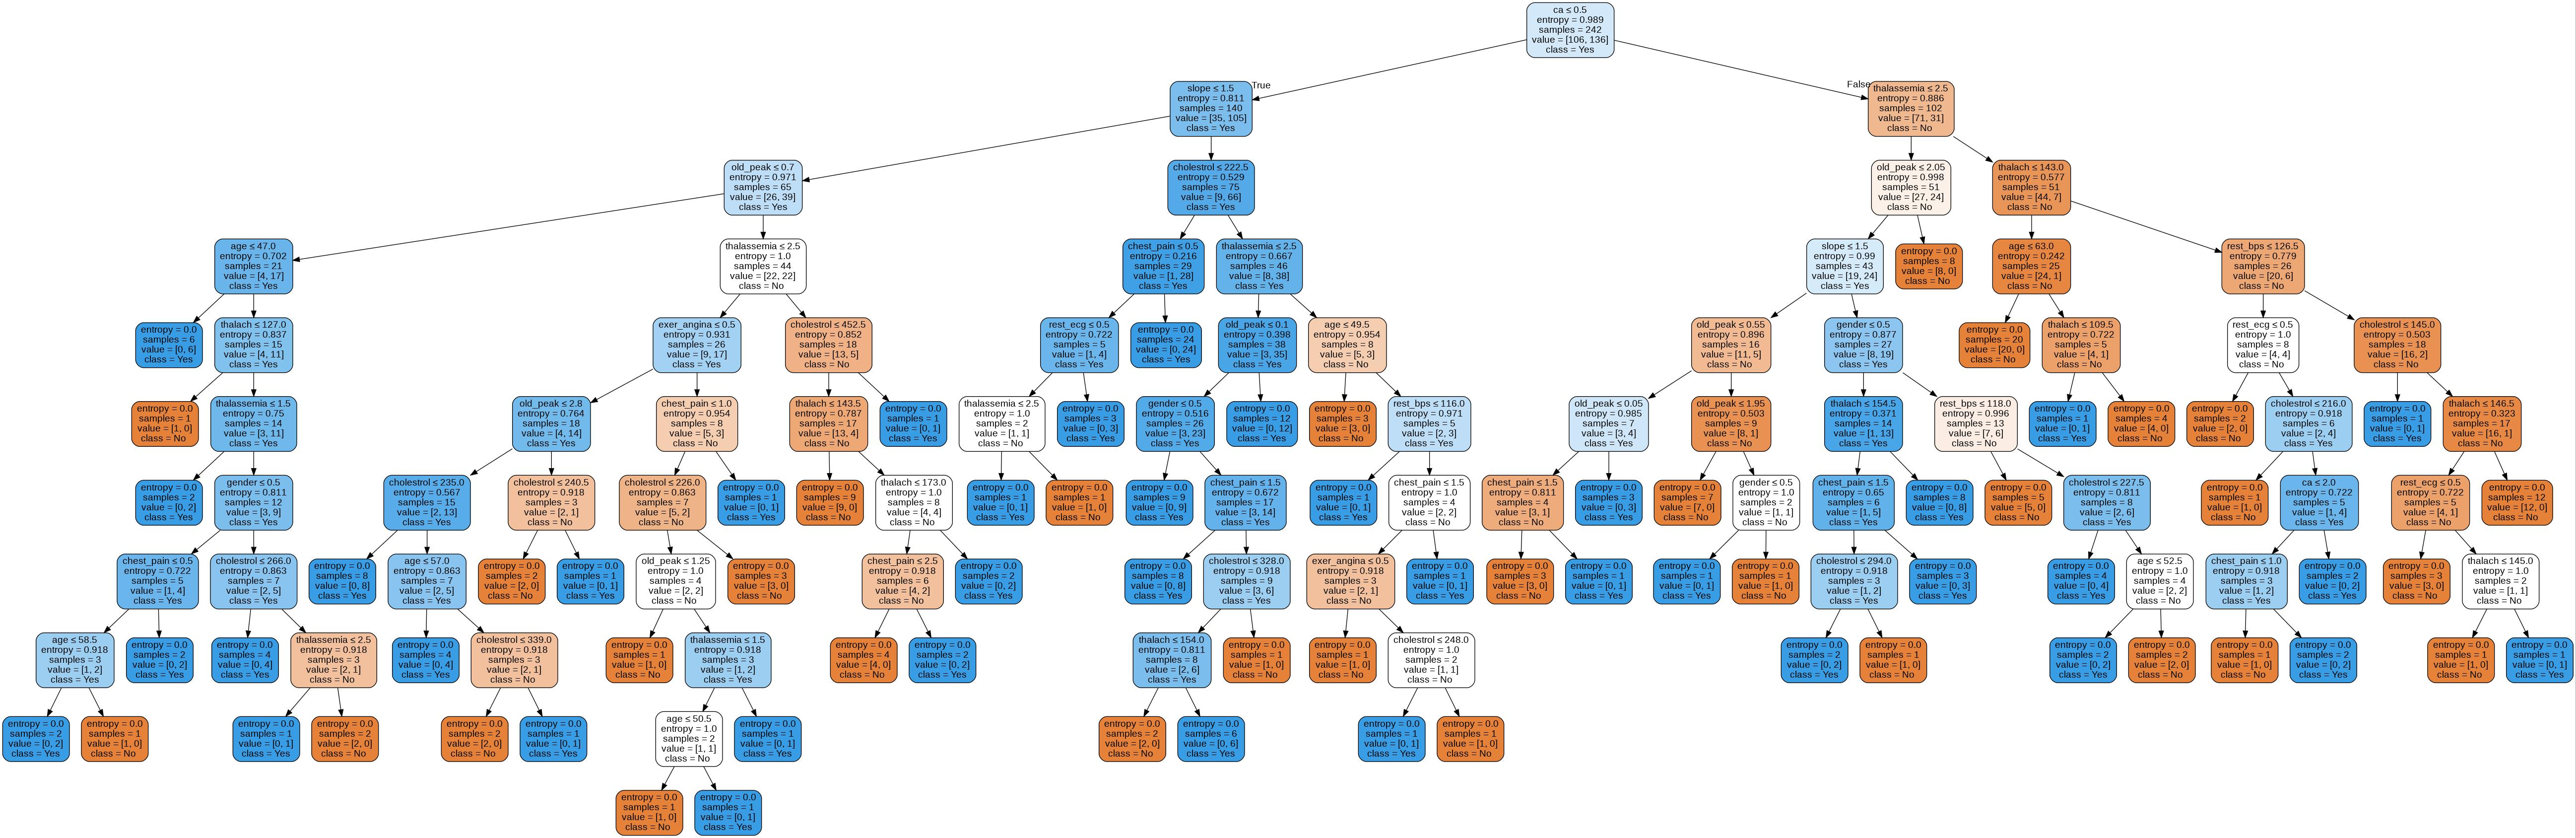

In [48]:
Image(graph1.create_jpeg())

Conclusion:

Thus we analyzied the heart disease dataset to explore the machine learning algorithms and have built the
decision tree model to predict the disease.
